<a href="https://colab.research.google.com/github/aj-39719/Deep-Learning-ST456/blob/main/Deep%20Learning%20Summative%202%20Part%201%20-%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **P1: Setup**

**Necessary Imports**

In [25]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.metrics import top_k_categorical_accuracy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(23)

**Setting up training and testing data**

In [2]:
from keras.datasets import cifar10
(data_train, label_train), (data_test, label_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


# **P1.1** 
**Neural Network Implementation**

In [5]:
# Checking our data shape
data_train.shape 

(50000, 32, 32, 3)

**Data preprocessing**

The pixel values are in the range of 0 to 255 for each of the red, green and blue channels. Since the data is loaded as integers, so we must cast it to floating point values.





In [6]:
# Normalizing inputs from 0-255 to 0.0-1.0
data_train = data_train.astype('float32')
data_test = data_test.astype('float32')
data_train = data_train / 255.0
data_test = data_test / 255.0

To better describe the classification issue, we may utilise a one-hot encoding to turn them into a binary matrix. Because there are ten classes in this problem, we may anticipate a binary matrix with a width of ten.

In [7]:
# Converting it to one-hot encoding - 
label_train = np_utils.to_categorical(label_train)
label_test = np_utils.to_categorical(label_test)
num_classes = label_test.shape[1]

**Plotting function**

In [8]:
def plot_graphs(history): 
 # plot diagnostic learning curves
 
 fig, [ax1, ax2, ax3] = plt.subplots(nrows = 1,ncols=3, figsize=(20,5))
 plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)
 ax1.plot(history.history['loss'], color='blue', label='training')
 ax1.plot(history.history['val_loss'], color='orange', label='testing')
 ax1.legend(loc="upper right")
 ax1.set_title('Cross Entropy Loss')
 ax1.set_xlabel('Epochs')
 ax1.set_ylabel('Loss')

 plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)
 ax2.set_title('Top 3 Accuracy')
 ax2.plot(history.history['top_3_accuracy'], color='blue', label='training')
 ax2.plot(history.history['val_top_3_accuracy'], color='orange', label='testing')
 ax2.legend(loc="upper left")
 ax2.set_xlabel('Epochs')
 ax2.set_ylabel('Top 3 Accuracy')

 plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)
 ax3.set_title('Top 5 Accuracy')
 ax3.plot(history.history['top_5_accuracy'], color='blue', label='training')
 ax3.plot(history.history['val_top_5_accuracy'], color='orange', label='testing')
 ax3.legend(loc="upper left")
 ax3.set_xlabel('Epochs')
 ax3.set_ylabel('Top 5 Accuracy')

**Model definition, training parameters and Model Summary**

In [9]:
# general model definition and training parameters
epochs = 100
lrate = 1e-2
decay = lrate/epochs
batch_size = 128

In [10]:
#Defining our Top 3 and Top 5 Accuracy Metrics
top3 = tf.keras.metrics.TopKCategoricalAccuracy(
    k=3, name="top_3_accuracy", dtype=None
)

top5 = tf.keras.metrics.TopKCategoricalAccuracy(
    k=5, name="top_5_accuracy", dtype=None
)

In [9]:
model1 = Sequential()

# ******** First Convolution Layer  ********
model1.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), padding='same', strides=1, activation='relu', kernel_initializer='he_uniform'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Second Convolution Layer  ********
model1.add(Conv2D(32, (5, 5), activation='relu', padding='same', strides=1, kernel_initializer='he_uniform'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Third Convolution Layer  ********
model1.add(Conv2D(32, (5, 5), activation='relu', padding='same', strides=1, kernel_initializer='he_uniform'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Fully  Connected  Layer  ********
model1.add(Flatten())
model1.add(Dense(1000, activation='relu'))

# ******** Final Output  Layer  ********
model1.add(Dense(num_classes, activation='softmax'))

# Compile model
sgd = SGD(learning_rate=lrate)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy',top3,top5])

print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

# **P1.2** 

**Training and Evaluation**

In [10]:
history1 = model1.fit(data_train, label_train,
                     validation_split = 0.25,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True,
                     steps_per_epoch = 50,
                     verbose = 0)

In [11]:
scores1 = model1.evaluate(data_test, label_test, verbose=0)
print("Top 1 Testing Accuracy is: %.2f%%" % (scores1[1]*100))

Top 1 Accuracy is: 58.45%


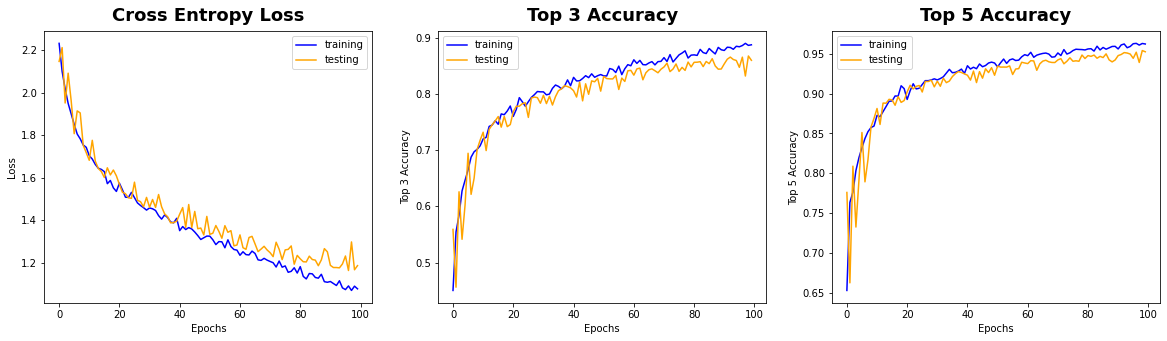

In [12]:
plot_graphs(history1)

**Discussion -** We obtain an accuracy rate of **58%** after training for 100 epochs. The model seems to fit just fine as the training and testing results are more or less converging up to 85 epochs. **The top-3 accuracy peaks around 90% and the top 5 accuracy peaks at 95%.**

# **P1.3** 

**Adding Dropout Layer**

In [13]:
model2 = Sequential()

# ******** First Convolution Layer  ********
model2.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), padding='same', strides=1, activation='relu', kernel_initializer='he_uniform'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Second Convolution Layer  ********
model2.add(Conv2D(32, (5, 5), activation='relu', padding='same', strides=1, kernel_initializer='he_uniform'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Third Convolution Layer  ********
model2.add(Conv2D(32, (5, 5), activation='relu', padding='same', strides=1, kernel_initializer='he_uniform'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Fully  Connected  Layer  ********
model2.add(Flatten())
model2.add(Dense(1000, activation='relu'))

# ******** Dropout  Layer  ********
model2.add(Dropout(0.15))

# ******** Final Output  Layer  ********
model2.add(Dense(num_classes, activation='softmax'))

# Compile model
sgd = SGD(learning_rate=lrate)
model2.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy',top3 , top5])

In [14]:
history2 = model2.fit(data_train, label_train,
                     validation_split= 0.25,
                     epochs=epochs,
                     batch_size=batch_size,
                     shuffle = True,
                     steps_per_epoch = 50,
                     verbose = 0)

In [15]:
scores2 = model2.evaluate(data_test, label_test, verbose=0)
print("Top 1 Accuracy after adding dropout layer is: %.2f%%" % (scores2[1]*100))

Top 1 Accuracy after adding dropout layer is: 59.85%


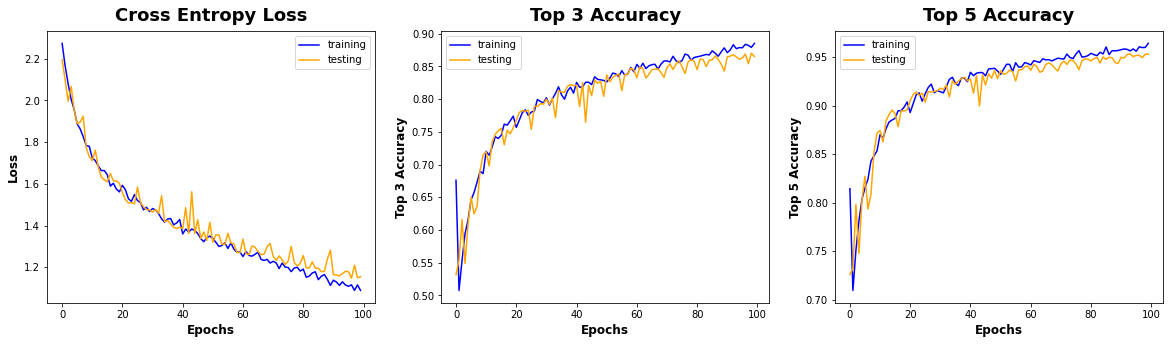

In [16]:
plot_graphs(history2)

**Discussion -** Hence, we see that our Accuracy marginally increased to roughly 59% after adding a dropout layer for 15% of our neural network. The overfitting seemed to reduce after adding the dropout layer, and both training/testing accuracies seemed to be increasing even after 100 epochs, as opposed to what was observed in part 1

# **P1.4** 

**Improving Model Performance**

**Method 1 - Using the 3 block VGG Architecture**

In [11]:
model3 = Sequential()

# ******** First Convolution Layer  ********
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Second Convolution Layer  ********
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Third Convolution Layer  ********
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Fully  Connected  Layer  ********
model3.add(Flatten())
model3.add(Dense(1000, activation='relu'))

# ******** Final Output  Layer  ********
model3.add(Dense(num_classes, activation='softmax'))

# Compile model
sgd = SGD(learning_rate=lrate)
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy',top3,top5])

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [13]:
history3 = model3.fit(data_train, label_train,
                     validation_split= 0.25,
                     epochs=epochs,
                     batch_size=256, #increasing batch size
                     shuffle = True,
                     steps_per_epoch = 50,
                     verbose = 0)

In [14]:
# Final evaluation of the model
scores3 = model3.evaluate(data_test, label_test, verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))

Accuracy: 65.26%


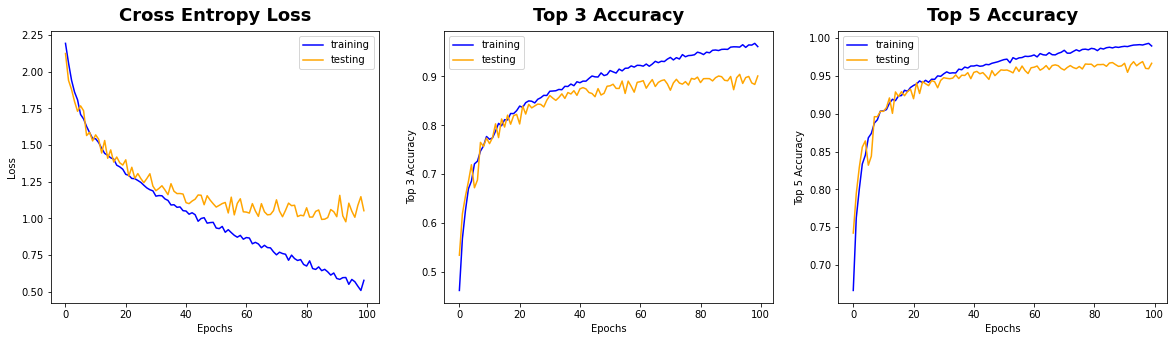

In [15]:
plot_graphs(history3)

**Discussion -** For this method, we implemented a 3 block VGG architecture, the intuition behind chosing this method was that the effect of an increasing number of feature maps with a smaller and smaller size given the max pooling layers will give a much better output than above. As expected, out model accuracy increased to about **65%** using this method. However, the model seems to overfit after about 50 epochs

**Method 2 - Weight Regularization and Increasing Batch Size**

In [16]:
from keras.regularizers import l2

model4 = Sequential()

# ******** First Convolution Layer with Regularizer  ********
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
model4.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Second Convolution Layer  ********
model4.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Third Convolution Layer  ********
model4.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

# ******** Fully  Connected  Layer  ********
model4.add(Flatten())
model4.add(Dense(1000, activation='relu'))

# ******** Final Output  Layer  ********
model4.add(Dense(num_classes, activation='softmax'))

# Compile model
sgd = SGD(learning_rate=lrate)
model4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy',top3,top5])

In [17]:
history4 = model4.fit(data_train, label_train,
                     validation_split= 0.25,
                     epochs=epochs,
                     batch_size=256, #increasing batch size
                     shuffle = True,
                     steps_per_epoch = 50,
                     verbose = 0)

In [18]:
# Final evaluation of the model
scores4 = model4.evaluate(data_test, label_test, verbose=0)
print("Accuracy: %.2f%%" % (scores4[1]*100))

Accuracy: 61.43%


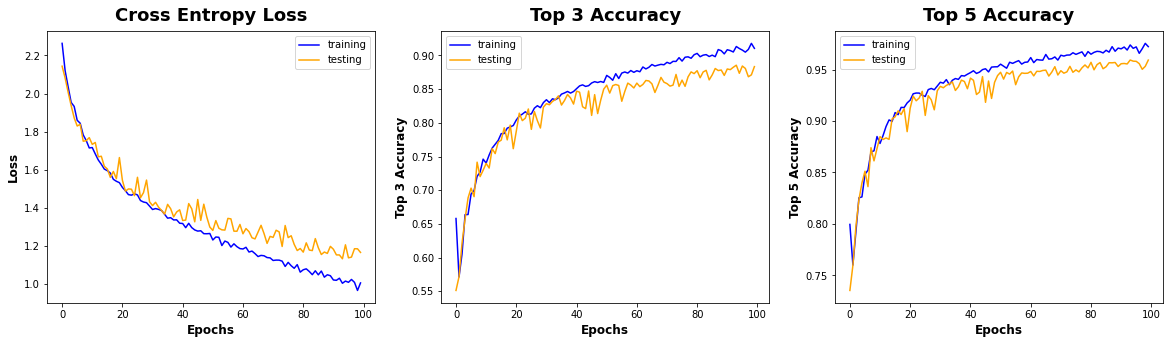

In [19]:
plot_graphs(history4)

**Discussion -** Again, the intuition behind adding a weight regularizer was to keep the weights small and make a much more stable model so as to address the overfitting nature observed above. As a result, the overfitting seemed to reduce more or less, but the accuracy obtained reduced to **61%**, which is still however beyond what was achieved in the base models. It can be assumed that since the number of convolution layers decreased from those in method 1, it effectively reduced the accuracy, which could have been more than what is observed right now.

**Method 3 - Dropout and Data Augmentation with Adam Optimizer and LR = 1e-3**

In [33]:
from keras.preprocessing.image import ImageDataGenerator

# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(data_train, label_train, batch_size=64)

In [34]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(MaxPooling2D())
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(MaxPooling2D())
model5.add(Dropout(0.2))
model5.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model5.add(MaxPooling2D())
model5.add(Dropout(0.2))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model5.add(Dense(num_classes, activation='softmax'))

In [35]:
adam = Adam(learning_rate = 1e-3)
model5.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy',top3,top5])

In [ ]:
steps = int(data_train.shape[0] / 64)
history5 = model5.fit_generator(it_train, steps_per_epoch=steps, epochs=10,validation_data=(data_test, label_test), verbose=1)

In [37]:
# Final evaluation of the model
scores5 = model5.evaluate(data_test, label_test, verbose=0)
print("Accuracy: %.2f%%" % (scores5[1]*100))

Accuracy: 77.56%


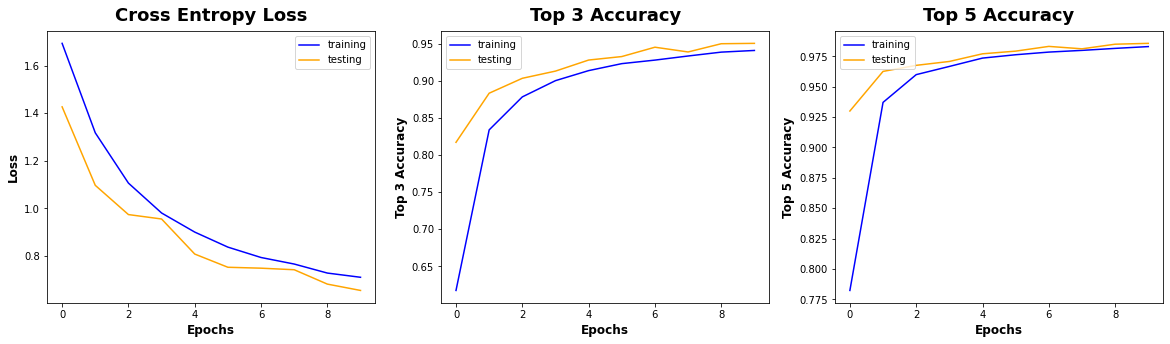

In [38]:
plot_graphs(history5)

**Discussion -** The reason for choosing Data Augmentation was that it has a normalising impact since it widens the training dataset while also allowing the model to learn the same general characteristics in a more comprehensive way.

We looked at the impact of simple augmentation on the baseline image, such as horizontal flips and 10% changes in the image's height and breadth. We chose these parameters as the images are small in size and we do not want to distort their important feautures a lot. 

We used Adam Optimizer with a learning rate of 1e-3 as this works mostly well with image data. 

As we can see above, we achieved phenomenal **accuracy of 77%** after just 10 epochs, which could be increased further by training more epochs. The **top-3 accuracy peaked at 93% and top-5 accuracy was over 98%**